In [15]:
import random
import matplotlib.pyplot as plt
import numpy as np
import numpy as np

In [16]:
# A single round of battle between an attacker and a defender.
def simulate_battle():
    # The attacker rolls 3 six-sided dice.
    attacker_dice = np.sort(np.random.randint(1, 7, 3))[::-1]
    # The defender rolls 2 six-sided dice.
    defender_dice = np.sort(np.random.randint(1, 7, 2))[::-1]
    
    # Initialize the counters for losses.
    attacker_losses = 0
    defender_losses = 0
    
    # First comparison: Compare the highest dice between attacker and defender.
    if attacker_dice[0] > defender_dice[0]:
        defender_losses += 1  # Defender loses a troop.
    else:
        attacker_losses += 1  # Attacker loses a troop.
    
    # Second comparison: Compare the second-highest dice.
    if attacker_dice[1] > defender_dice[1]:
        defender_losses += 1  # Defender loses a troop.
    else:
        attacker_losses += 1  # Attacker loses a troop.
    
    # Determine who won based on the number of losses.
    if attacker_losses > defender_losses:
        winner = "Defender"  # Attacker loses both rounds.
    elif attacker_losses < defender_losses:
        winner = "Attacker"  # Defender loses both rounds.
    else:
        winner = "Tie"  # Both sides lose 1 troop each.
    
    # Return the number of losses and the winner of the round.
    return attacker_losses, defender_losses, winner, attacker_dice, defender_dice

# Run the battle simulation.
attacker_vic, defender_vic, winner, attacker_dice, defender_dice = simulate_battle()

# Display the dice rolls for each participant.
print(f"Attacker's dice: {attacker_dice}")
print(f"Defender's dice: {defender_dice}")

# Show the battle outcome.
print(f"\nBattle result: Attacker Victories = {attacker_vic}, Defender Victories = {defender_vic}")
print(f"The Winner is: {winner}")

Attacker's dice: [4 2 2]
Defender's dice: [6 2]

Battle result: Attacker Victories = 2, Defender Victories = 0
The Winner is: Defender


Total Attacker Wins: 371
Total Defender Wins: 278
Ties: 351


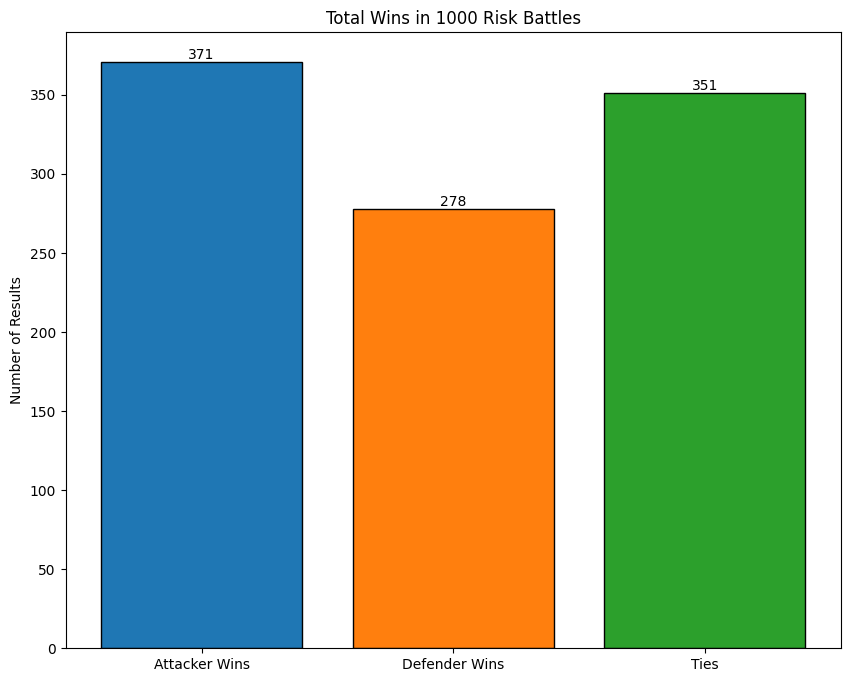

In [17]:
# Initialize counters for tracking overall battle results.
attacker_wins = 0
defender_wins = 0
ties = 0 
attacker_losses_total = []
defender_losses_total = []
winner_history = [] 

# Simulate 1000 battles.
for _ in range(1000):
    # Simulate one battle round, ignoring the dice values (using _).
    attacker_losses, defender_losses, winner, _, _ = simulate_battle()  # _ used to ignore dice results.
    
    # Collect the losses for the attacker and defender.
    attacker_losses_total.append(attacker_losses)
    defender_losses_total.append(defender_losses)
    winner_history.append(winner)
    
    # Increment the winner counter based on the result.
    if winner == "Attacker":
        attacker_wins += 1  # Increment attacker win count.
    elif winner == "Defender":
        defender_wins += 1  # Increment defender win count.
    else:
        ties += 1  # Increment tie count.

# Output the total results from the 1000 simulations.
print(f"Total Attacker Wins: {attacker_wins}")
print(f"Total Defender Wins: {defender_wins}")
print(f"Ties: {ties}")

# Create a bar chart showing the total win counts for each side, including ties.
plt.figure(figsize=(10, 8))
bars = plt.bar(
    ['Attacker Wins', 'Defender Wins', 'Ties'],
    [attacker_wins, defender_wins, ties],
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # New colors: Blue, Orange, Green
    edgecolor='black'
)
plt.title('Total Wins in 1000 Risk Battles')
plt.ylabel('Number of Results')

# Annotate each bar with its corresponding value.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Display the plot.
plt.show()

Battle Result: Attacker Wins!


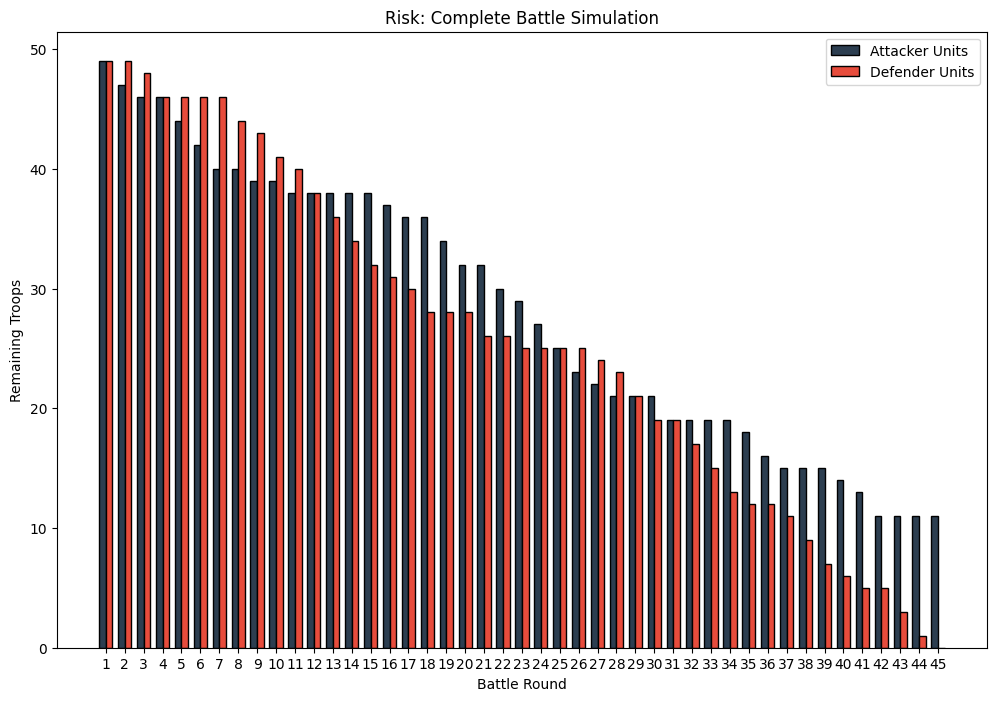

In [18]:
# Simulate a complete conflict between the attacker and defender.
def conduct_full_battle(attacker_units, defender_units):
    attacker_progress = []  # Track the remaining troops of the attacker.
    defender_progress = []  # Track the remaining troops of the defender.
    battle_rounds = []       # Record the round numbers.
    
    round_count = 1  # Initialize the first round.
    while attacker_units > 0 and defender_units > 0:
        # Execute one battle round
        attacker_loss, defender_loss, _, _ = conduct_battle_round(attacker_units, defender_units)
        
        # Update the unit counts.
        attacker_units -= attacker_loss
        defender_units -= defender_loss
        
        # Log the results of this round.
        attacker_progress.append(attacker_units)
        defender_progress.append(defender_units)
        battle_rounds.append(round_count)
        
        # Move to the next round.
        round_count += 1
    
    return battle_rounds, attacker_progress, defender_progress

# Simulate a single round of battle.
def conduct_battle_round(attacker_units, defender_units):
    # Attacker rolls 3 dice (limited by the number of remaining units).
    attacker_rolls = np.sort(np.random.randint(1, 7, min(3, attacker_units)))[::-1]
    
    # Defender rolls 2 dice (limited by the number of remaining units).
    defender_rolls = np.sort(np.random.randint(1, 7, min(2, defender_units)))[::-1]
    
    # Initialize the number of losses.
    attacker_loss = 0
    defender_loss = 0
    
    # Compare the rolls, highest to lowest dice.
    for i in range(min(len(attacker_rolls), len(defender_rolls))):
        if attacker_rolls[i] > defender_rolls[i]:
            defender_loss += 1
        else:
            attacker_loss += 1
    
    return attacker_loss, defender_loss, attacker_rolls, defender_rolls

# Starting number of troops for both sides.
initial_attacker_units = 50 
initial_defender_units = 50  

# Simulate the entire battle.
rounds, attacker_progress, defender_progress = conduct_full_battle(initial_attacker_units, initial_defender_units)

# Determine the winner based on remaining troops.
if attacker_progress[-1] == 0:
    print("Battle Result: Defender Wins!")
else:
    print("Battle Result: Attacker Wins!")

# Visualize the progress of both sides.
bar_width = 0.35
positions = np.arange(len(rounds))

plt.figure(figsize=(12, 8))

# Plot attacker and defender troop counts for each round.
plt.bar(positions - bar_width/2, attacker_progress, bar_width, label='Attacker Units', color='#2c3e50', edgecolor='black')
plt.bar(positions + bar_width/2, defender_progress, bar_width, label='Defender Units', color='#e74c3c', edgecolor='black')

# Add labels and title.
plt.title('Risk: Complete Battle Simulation')
plt.xlabel('Battle Round')
plt.ylabel('Remaining Troops')
plt.xticks(positions, rounds)
plt.legend()

# Show the plot.
plt.show()